In [92]:
import numpy as np
import matplotlib.pyplot as plt

In [97]:
calibration1 = np.load("calibration_1.npy")
calibration2 = np.load("calibration_10.npy")
calibration3 = np.load("calibration_20.npy")
calibration4 = np.load("calibration_50.npy")
calibration5 = np.load("calibration_100.npy")

In [98]:
calibration1.shape

(200, 2)

In [99]:
def compute_empirical_cdf(samples, num_bins=50):
    # Define bins
    hist, bin_edges = np.histogram(samples, bins=num_bins, density=False)

    # Calculate CDF values based on bin counts
    cdf_values = np.cumsum(hist) / np.sum(hist)  # Cumulative sum normalized
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Calculate bin centers for plotting

    return bin_centers, cdf_values

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following famil

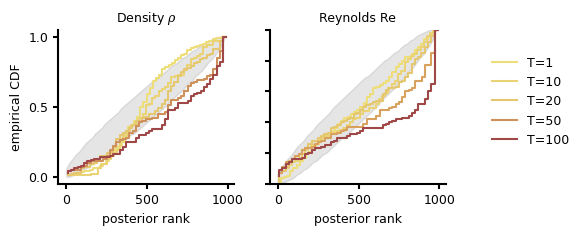

In [124]:
from markovsbi.bm.plot_utils import use_style
from scipy.stats import binom
import numpy as np
# Construct uniform histogram.
num_sbc_runs = 100
num_bins=50
num_samples=1000
color="grey"
alpha = 0.2
uni_bins = binom(num_sbc_runs, p=1 / num_bins).ppf(0.5) * np.ones(num_bins)
uni_bins_cdf = uni_bins.cumsum() / uni_bins.sum()
# Decrease value one in last entry by epsilon to find valid
# confidence intervals.
uni_bins_cdf[-1] -= 1e-9


import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
color1 = "#EEDF7A"
color2 = "#D8A25E"
color3 = "#A04747"

colors = [color1, color2, color3]
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors)


lower = [binom(num_sbc_runs, p=p).ppf(0.005) for p in uni_bins_cdf]
upper = [binom(num_sbc_runs, p=p).ppf(0.995) for p in uni_bins_cdf]

lower = np.array(lower)
upper = np.array(upper)

with use_style("pyloric"):
    fig,axes = plt.subplots(1,2, figsize=(5,2))

    # Plot grey area with expected ECDF.
    axes[0].fill_between(
        x=np.arange(0, num_samples,num_samples//num_bins),
        y1=lower / lower.max(),
        y2=upper / upper.max(),  # pyright: ignore[reportArgumentType]
        color=color,
        alpha=alpha,
        label="expected under uniformity",
    )

    axes[1].fill_between(
        x=np.arange(0, num_samples, num_samples//num_bins),
        y1=lower / lower.max(),
        y2=upper / upper.max(),  # pyright: ignore[reportArgumentType]
        color=color,
        alpha=alpha,
        label="expected under uniformity",
    )

    axes[0].set_title(r"Density $\rho$")
    sorted_samples, cdf_values = compute_empirical_cdf(calibration1[:200,0])
    l1, = axes[0].step(sorted_samples,cdf_values, color=cmap(1/100), label="T=1")

    sorted_samples, cdf_values = compute_empirical_cdf(calibration2[:200,0])
    l2, =axes[0].step(sorted_samples,cdf_values, color=cmap(10/100), label="T=10")

    sorted_samples, cdf_values = compute_empirical_cdf(calibration3[:200,0])
    l3, = axes[0].step(sorted_samples,cdf_values, color=cmap(20/100), label="T=20")

    sorted_samples, cdf_values = compute_empirical_cdf(calibration4[:200,0])
    l4, =axes[0].step(sorted_samples,cdf_values, color=cmap(59/100), label="T=50")
    sorted_samples, cdf_values = compute_empirical_cdf(calibration5[:500,0])
    l5, = axes[0].step(sorted_samples,cdf_values, color=cmap(100/100), label="T=100")

    axes[1].set_title("Reynolds Re")
    axes[1].set_yticklabels([])
    sorted_samples, cdf_values = compute_empirical_cdf(calibration1[:200,1])
    axes[1].step(sorted_samples,cdf_values, color=cmap(1/100))

    sorted_samples, cdf_values = compute_empirical_cdf(calibration2[:200,1])
    axes[1].step(sorted_samples,cdf_values, color=cmap(10/100))

    sorted_samples, cdf_values = compute_empirical_cdf(calibration3[:200,1])
    axes[1].step(sorted_samples,cdf_values, color=cmap(20/100))
    sorted_samples, cdf_values = compute_empirical_cdf(calibration4[:200,1])
    axes[1].step(sorted_samples,cdf_values, color=cmap(50/100))
    sorted_samples, cdf_values = compute_empirical_cdf(calibration5[:200,1])
    axes[1].step(sorted_samples,cdf_values, color=cmap(100/100))
    axes[0].set_xlabel("posterior rank")
    axes[1].set_xlabel("posterior rank")
    axes[0].set_ylabel("empirical CDF")
    axes[0].set_yticks([0.,0.5,1.])
    axes[1].set_ylim([0.,1.])

    plt.legend(handles=[l1,l2,l3,l4,l5], bbox_to_anchor=[1.2,0.9])
    fig.savefig("kolmogorov_calibration.svg")